In [2]:
%run sfei_wind.py

0/744 steps
2017-08-02 00:00
2017-08-02 01:00
2017-08-02 02:00
2017-08-02 03:00
2017-08-02 04:00
2017-08-02 05:00
2017-08-02 06:00
2017-08-02 07:00
2017-08-02 08:00
2017-08-02 09:00
2017-08-02 10:00
2017-08-02 11:00
2017-08-02 12:00
2017-08-02 13:00
2017-08-02 14:00
2017-08-02 15:00
2017-08-02 16:00
2017-08-02 17:00
2017-08-02 18:00
2017-08-02 19:00
2017-08-02 20:00
2017-08-02 21:00
2017-08-02 22:00
2017-08-02 23:00
COAMPS shape:  (47, 41)
10/744 steps
20/744 steps
30/744 steps
40/744 steps
2017-08-03 00:00
2017-08-03 01:00
2017-08-03 02:00
2017-08-03 03:00
2017-08-03 04:00
2017-08-03 05:00
2017-08-03 06:00
2017-08-03 07:00
2017-08-03 08:00
2017-08-03 09:00
2017-08-03 10:00
2017-08-03 11:00
2017-08-03 12:00
2017-08-03 13:00
2017-08-03 14:00
2017-08-03 15:00
2017-08-03 16:00
2017-08-03 17:00
2017-08-03 18:00
2017-08-03 19:00
2017-08-03 20:00
2017-08-03 21:00
2017-08-03 22:00
2017-08-03 23:00
2017-08-04 00:00
2017-08-04 01:00
2017-08-04 02:00
2017-08-04 03:00
2017-08-04 04:00
2017-08-04 

2017-08-20 02:00
2017-08-20 03:00
2017-08-20 04:00
2017-08-20 05:00
2017-08-20 06:00
2017-08-20 07:00
2017-08-20 08:00
2017-08-20 09:00
2017-08-20 10:00
2017-08-20 11:00
2017-08-20 12:00
2017-08-20 13:00
2017-08-20 14:00
2017-08-20 15:00
2017-08-20 16:00
2017-08-20 17:00
2017-08-20 18:00
2017-08-20 19:00
2017-08-20 20:00
2017-08-20 21:00
2017-08-20 22:00
2017-08-20 23:00
COAMPS shape:  (47, 41)
440/744 steps
450/744 steps
460/744 steps
470/744 steps
480/744 steps
2017-08-21 00:00
2017-08-21 01:00
2017-08-21 02:00
2017-08-21 03:00
2017-08-21 04:00
2017-08-21 05:00
2017-08-21 06:00
2017-08-21 07:00
2017-08-21 08:00
2017-08-21 09:00
2017-08-21 10:00
2017-08-21 11:00
2017-08-21 12:00
2017-08-21 13:00
2017-08-21 14:00
2017-08-21 15:00
2017-08-21 16:00
2017-08-21 17:00
2017-08-21 18:00
2017-08-21 19:00
2017-08-21 20:00
2017-08-21 21:00
2017-08-21 22:00
2017-08-21 23:00
2017-08-22 00:00
2017-08-22 01:00
2017-08-22 02:00
2017-08-22 03:00
2017-08-22 04:00
2017-08-22 05:00
2017-08-22 06:00
2017-

In [68]:
run_dir="/opt/sfb_ocean/suntans/runs/merge_005-20170610/"

In [69]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import six
from stompy.model.suntans import sun_driver
%matplotlib notebook

In [70]:
six.moves.reload_module(sun_driver)
sun_driver.SuntansModel.sun_bin_dir="/home/rusty/src/suntans/main"
sun_driver.SuntansModel.mpi_bin_dir="/usr/bin/"


In [71]:
model=sun_driver.SuntansModel.load(run_dir)
model.projection="EPSG:26910"

INFO:DFlowModel:Will read cell depths, too
INFO:DFlowModel:Will read edge depths, too
INFO:UnstructuredGrid:Will flip 0 edges


In [ ]:
import coamps_sfei_wind
six.moves.reload_module(coamps_sfei_wind)

model.run_stop=np.datetime64("2017-06-10 00:10:00")
model.config['varmodel']=0
coamps_sfei_wind.add_wind(model,'cache',pad=np.timedelta64(3*3600,'s'))


model.write_met_ds()
model.update_config()
model.write_config()


model.run_simulation()

In [77]:
map_ds=xr.open_dataset(model.map_outputs()[0])
model.load_met_ds()
met_ds=model.met_ds
met_ds.close() # be sure we get a fresh read here.
model.met_ds=None
model.load_met_ds()
met_ds=model.met_ds


In [73]:
model.map_outputs()[0]

'/opt/sfb_ocean/suntans/runs/merge_005-20170610/Estuary_SUNTANS.nc_0000.nc'

<IPython.core.display.Javascript object>


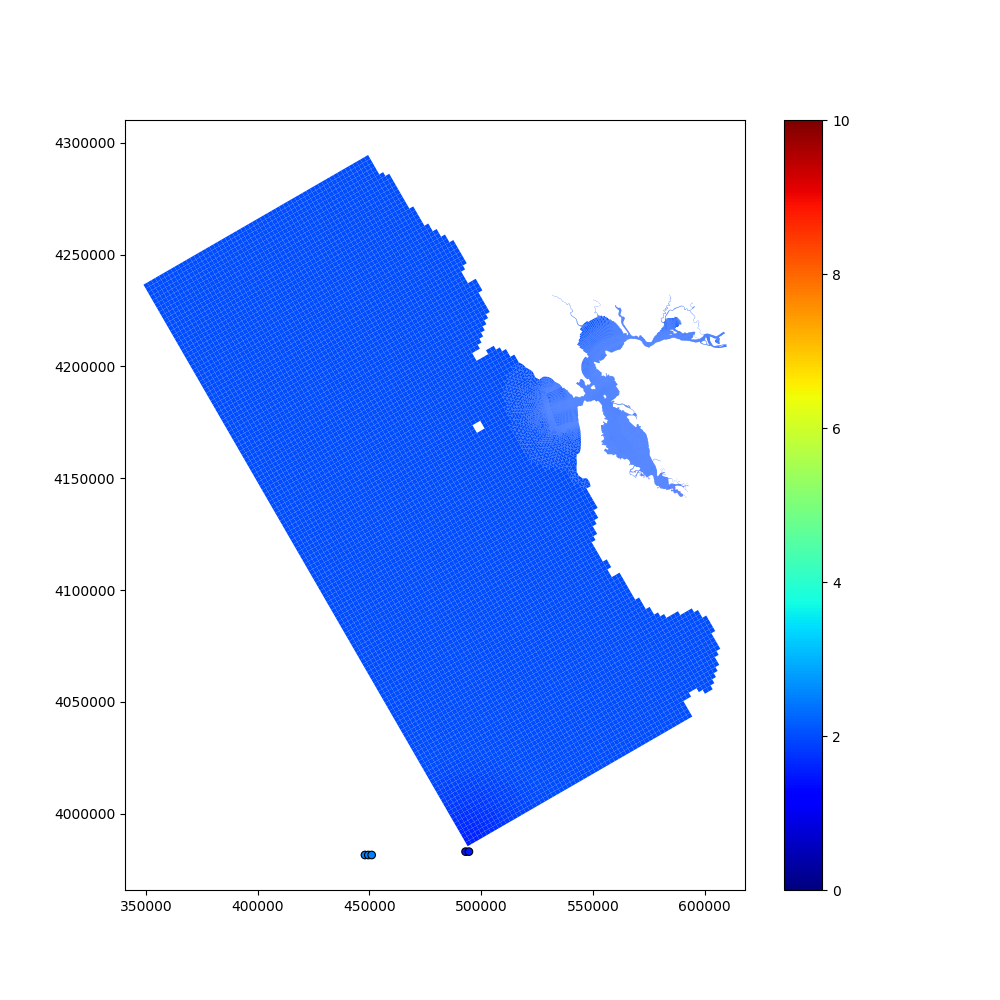

In [79]:
plt.figure(figsize=(10,10))
ax=plt.gca()

g=model.grid
ccoll=g.plot_cells(values=map_ds.Uwind.isel(time=0).values)

scat=ax.scatter(met_ds.x_Uwind.values, 
                met_ds.y_Uwind.values, 30, 
                met_ds.Uwind.isel(nt=3).values)
scat.set_lw(0.8)
scat.set_edgecolor('k')
ax.axis('equal')

plt.setp([ccoll,scat],cmap='jet',clim=[0,10])
# ccoll.set_visible(0)
plt.colorbar(ccoll)
# plt.colorbar(scat)

In [76]:
map_ds.close()
met_ds.close()

In [ ]:
plt.figure()
ax=plt.gca()

slc=slice(None) # slice(0,3050)

scat=ax.scatter(met_ds.x_Uwind.values[slc], 
                met_ds.y_Uwind.values[slc], 30, 
                met_ds.Uwind.isel(nt=10).values[slc],
                 cmap='jet')
ax.axis('equal')

In [97]:
blended_ds=xr.open_dataset('wind_natneighbor_201706.nc')

<IPython.core.display.Javascript object>


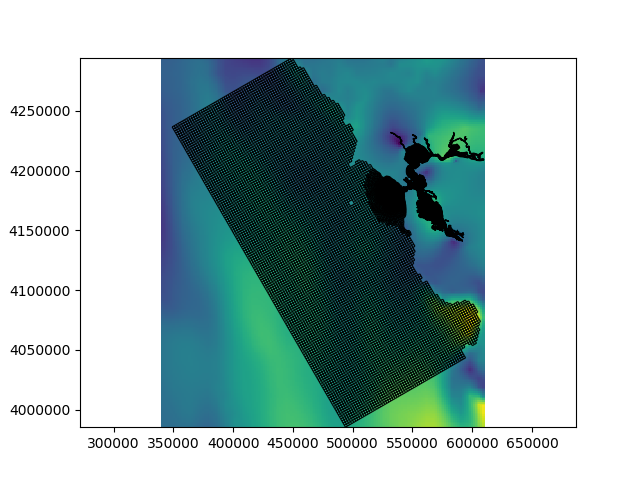

In [98]:
plt.figure()
plt.pcolormesh(blended_ds.x.values,
               blended_ds.y.values, 
               blended_ds.wind_u.isel(time=3).values)
model.grid.plot_edges(color='k')

In [99]:
g=model.grid
from stompy.spatial import field
from shapely import geometry
g_poly=geometry.Polygon(g.boundary_polygon().exterior).buffer(3000)
src_ds=blended_ds
src_name='blended'
fld=field.SimpleGrid(extents=[src_ds.x.values[0],
                              src_ds.x.values[-1],
                              src_ds.y.values[0],
                              src_ds.y.values[-1]],
                     F=src_ds.wind_u.isel(time=0).values)
print("%s: gridded resolution: %.2f %.2f"%(src_name,fld.dx,fld.dy))
mask=fld.polygon_mask(g_poly)
print("%s: %d of %d samples fall within grid"%(src_name,mask.sum(),mask.size))


INFO:join_features:0 open strings, 20 simple polygons
INFO:join_features:Building index
INFO:join_features:done building index
INFO:join_features:Examining largest poly left with area=38248243981.875114, 19 potential interiors


blended: gridded resolution: 1500.00 1500.00
blended: 18936 of 38010 samples fall within grid


In [93]:
blended_ds.load()

<xarray.Dataset>
Dimensions:  (time: 720, x: 181, y: 210)
Coordinates:
  * time     (time) datetime64[ns] 2017-06-01 ... 2017-06-30T23:00:00
  * x        (x) float64 3.4e+05 3.415e+05 3.43e+05 ... 6.085e+05 6.1e+05
  * y        (y) float64 4.294e+06 4.292e+06 4.290e+06 ... 3.982e+06 3.98e+06
Data variables:
    wind_u   (time, y, x) float32 0.25752544 0.278927 ... 7.2311225 7.407909
    wind_v   (time, y, x) float32 3.680168 3.7026439 ... -6.039752 -5.982088

In [94]:
flipped=blended_ds.isel(y=slice(None,None,-1))

In [95]:
blended_ds.close()

In [96]:
flipped.to_netcdf('wind_natneighbor_201706.nc')

In [ ]:
np.sum(~np.isfinite(met_ds.Uwind.values))

In [ ]:
all_xy=np.c_[met_ds.x_Uwind.values,
             met_ds.y_Uwind.values]
from shapely import geometry
from shapely.ops import cascaded_union

pnts=[geometry.Point(xy[0],xy[1])
      for xy in all_xy[slc]]
                     
poly=cascaded_union( [p.buffer(30e3) for p in pnts] )
poly

0/240 steps
Invoking natgrid with 1394 points
Finished
Invoking natgrid with 1343 points
Finished
Invoking natgrid with 1342 points
Finished
Invoking natgrid with 1343 points
Finished
Invoking natgrid with 1344 points
Finished
Invoking natgrid with 1344 points
Finished
Invoking natgrid with 1345 points
Finished
Invoking natgrid with 1344 points
Finished
Invoking natgrid with 1343 points
Finished
Invoking natgrid with 1343 points
Finished
Invoking natgrid with 1345 points
Finished
Invoking natgrid with 1345 points
Finished
Invoking natgrid with 1345 points
Finished
Invoking natgrid with 1345 points
Finished
Invoking natgrid with 1346 points
Finished
Invoking natgrid with 1346 points
Finished
Invoking natgrid with 1346 points
Finished
Invoking natgrid with 1346 points
Finished
Invoking natgrid with 1346 points
Finished
Invoking natgrid with 1346 points
Finished
Invoking natgrid with 1346 points
Finished
Invoking natgrid with 1346 points
Finished
Invoking natgrid with 1356 points
Finished

Finished
Invoking natgrid with 1345 points
Finished
Invoking natgrid with 1345 points
Finished
Invoking natgrid with 1345 points
Finished
Invoking natgrid with 1344 points
Finished
Invoking natgrid with 1344 points
Finished
Invoking natgrid with 1344 points
Finished
Invoking natgrid with 1341 points
Finished
Invoking natgrid with 1347 points
Finished
Invoking natgrid with 1348 points
Finished
200/240 steps
Invoking natgrid with 1346 points
Finished
Invoking natgrid with 1344 points
Finished
Invoking natgrid with 1343 points
Finished
Invoking natgrid with 1344 points
Finished
Invoking natgrid with 1349 points
Finished
Invoking natgrid with 1339 points
Finished
Invoking natgrid with 1343 points
Finished
Invoking natgrid with 1343 points
Finished
Invoking natgrid with 1341 points
Finished
Invoking natgrid with 1341 points
Finished
Invoking natgrid with 1341 points
Finished
Invoking natgrid with 1340 points
Finished
Invoking natgrid with 1338 points
Finished
Invoking natgrid with 1339 poin

<IPython.core.display.Javascript object>


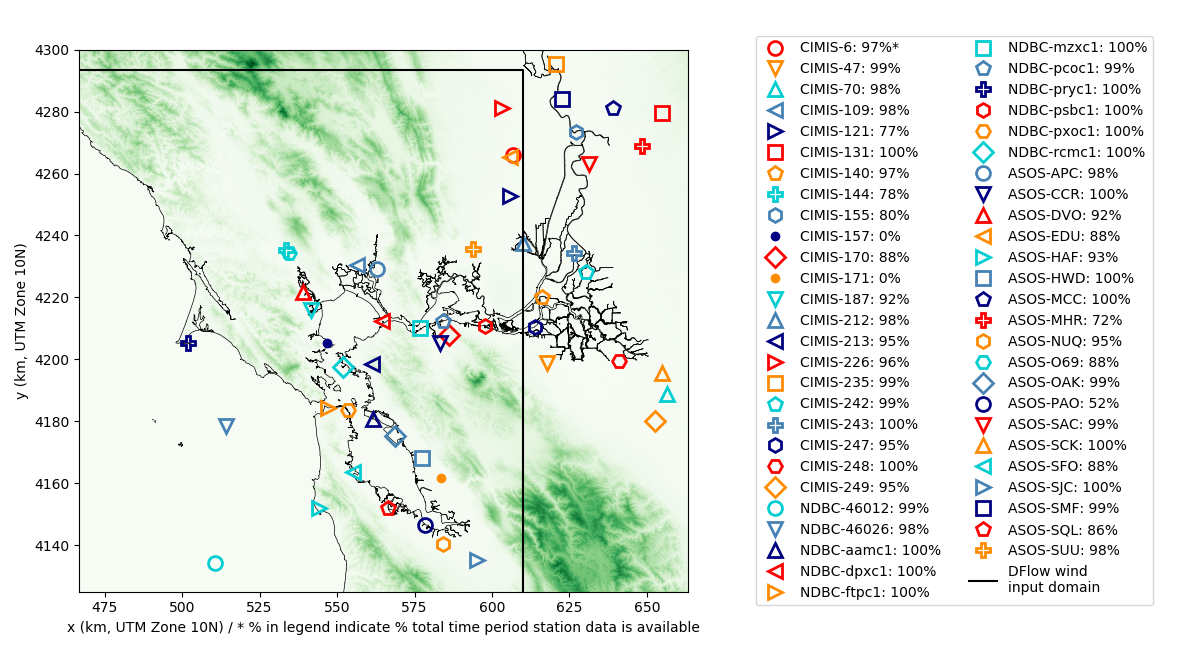

In [33]:
import sfei_wind

In [35]:
import stompy.model.delft.io as dio
dio.dfm_wind_to_nc('wind_natneighbor_subset.amu',
                   'wind_natneighbor_subset.amv',
                   'wind_natneighbor_subset.nc')

0 frames, 2017-06-10T08:00:00 most recent
200 frames, 2017-06-18T16:00:00 most recent


In [61]:
%run sfei_wind.py

0/720 steps
COAMPS shape:  (47, 41)
10/720 steps
20/720 steps
30/720 steps
40/720 steps
COAMPS shape:  (47, 41)
50/720 steps
60/720 steps
70/720 steps
80/720 steps
90/720 steps
COAMPS shape:  (47, 41)
100/720 steps
110/720 steps
120/720 steps
130/720 steps
140/720 steps
COAMPS shape:  (47, 41)
150/720 steps
160/720 steps
170/720 steps
180/720 steps
190/720 steps
COAMPS shape:  (46, 39)
200/720 steps
210/720 steps
220/720 steps
230/720 steps
240/720 steps
COAMPS shape:  (46, 39)
250/720 steps
260/720 steps
270/720 steps
280/720 steps
COAMPS shape:  (46, 39)
290/720 steps
300/720 steps
310/720 steps
320/720 steps
330/720 steps
COAMPS shape:  (46, 39)
340/720 steps
350/720 steps
360/720 steps
370/720 steps
380/720 steps
COAMPS shape:  (46, 39)
390/720 steps
400/720 steps
410/720 steps
420/720 steps
430/720 steps
COAMPS shape:  (46, 39)
440/720 steps
450/720 steps
460/720 steps
470/720 steps
480/720 steps
COAMPS shape:  (80, 82)
490/720 steps
500/720 steps
510/720 steps
520/720 steps
2017-

NameError: name 'xr' is not defined

In [66]:
import xarray as xr
ds=xr.Dataset()
ds['time']=('time',), start_date + (time_days*86400).astype(np.int32)*np.timedelta64(1,'s')
ds['x']=('x',),x
ds['y']=('y',),y
ds['wind_u']=('time','y','x'), U10g_all
ds['wind_v']=('time','y','x'), V10g_all


In [67]:
nc_fn=outfileprefix+".nc"
os.path.exists(nc_fn) and os.unlink(nc_fn)
ds.to_netcdf(nc_fn)


<IPython.core.display.Javascript object>


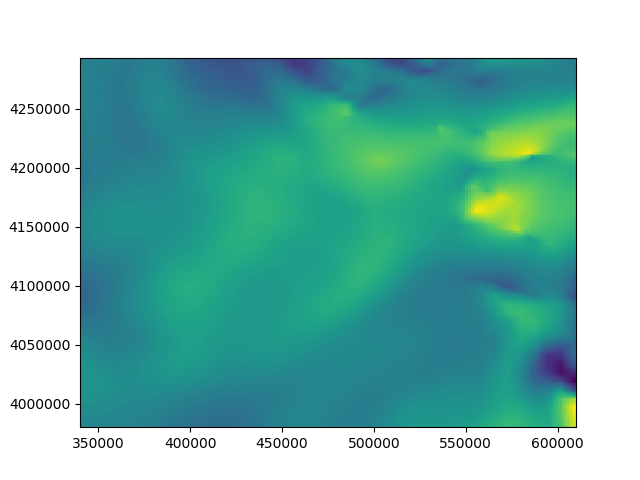

In [39]:
plt.figure()

plt.pcolormesh(wind_ds.x.values,wind_ds.y.values,wind_ds.wind_u.isel(time=0).values)